In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.help()


__________NERLNET CHECKLIST__________
Nerlnet configuration files are located at config directory.
Make sure data and jsons in correct folder, and jsons include the correct paths
* Data includes: a single csv that includes all the data for the experiment (training and prediction phases)
* Jsons include: - distributed configuration (dc_<name>.json)
                 - connection map (conn_<name>.json)
                 - experiment flow (exp_<name>.json)
* Jsons directory: can be defined by changing the config file: config/jsonsDir.nerlconfig

____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                                           lists available json files in jsons directory (dc, conn, exp) to be used with setJsons and getUserJsons
-list_datasets():                                       reads `hf_repo_ids.json` and list of datasets and files of Nerlnet organizaion on https://huggingface.co/Nerlnet
-download_dataset(idx, dir):                   

In [4]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_EEG_1d_2c_1s_4r_4w.json
1.	dc_eeg_5d_4w_2c_4s_2r.json
2.	dc_synt_8d_8w_2c_4s_4r.json
3.	dc_synt_8d_8w_4c_6r_4s.json
4.	dc_synt_distributed_w5_c3_6r_3s_3d.json
5.	dc_test_synt_1d_2c_1s_4r_4w.json
6.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.json
16.	conn_6RouterCycle8Clients1Source.json
17.	conn_6RouterLine6Clients1Source.json
18.	conn_8RouterCycle8Clients1Sou

In [5]:
dc = 1
conn = 20
exp = 2
API.setJsons(dc , conn , exp)

In [6]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [7]:
API.list_datasets()

[INFO][2024-05-23 13:03:19,812] 0. Nerlnet/skab: ['skab_full.csv']
[INFO][2024-05-23 13:03:19,812] 1. Nerlnet/MNist: []
[INFO][2024-05-23 13:03:19,813] 2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
[INFO][2024-05-23 13:03:19,813] 3. Nerlnet/EEG_Eye_State_Classification: ['EEG_Eye_State_Classification.csv', 'EEG_Eye_State_Classification_table_freq_window.csv']
[INFO][2024-05-23 13:03:19,814] 4. Nerlnet/EEG_Eye_State_Classification_table_freq_window: ['EEG_Eye_State_Classification_table_freq_window.csv']


In [8]:
API.add_repo_to_datasets_list("Nerlnet/EEG_Eye_State_Classification_table_freq_window", "EEG_freq_eye_state_classification", "3 class of classification")

Repository Nerlnet/EEG_Eye_State_Classification_table_freq_window already exists in the hf_repo_ids.json


In [9]:
API.list_datasets()

[INFO][2024-05-23 13:03:20,540] 0. Nerlnet/skab: ['skab_full.csv']
[INFO][2024-05-23 13:03:20,540] 1. Nerlnet/MNist: []
[INFO][2024-05-23 13:03:20,541] 2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
[INFO][2024-05-23 13:03:20,543] 3. Nerlnet/EEG_Eye_State_Classification: ['EEG_Eye_State_Classification.csv', 'EEG_Eye_State_Classification_table_freq_window.csv']
[INFO][2024-05-23 13:03:20,544] 4. Nerlnet/EEG_Eye_State_Classification_table_freq_window: ['EEG_Eye_State_Classification_table_freq_window.csv']


In [10]:
API.download_dataset(4)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO][2024-05-23 13:03:20,696] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/EEG_freq_eye_state_classification


In [11]:
exp_name = "EEG_Freq_Eye_State_Classification"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-05-23 13:03:21,132] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 5 [batches/sec]
                 Batchsize: 2 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.7', '10.0.0.10', '10.0.0.8', '10.0.0.12']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1', 's2', 's3', 's4']
                 Routers: ['r1', 'r2']
[INFO][2024-05-23 13:03:21,133] Connections:
[INFO][2024-05-23 13:03:21,135] 		 r1 : ['mainServer', 'c1', 'r2', 's2', 's1']
[INFO][2024-05-23 13:03:21,136] 		 r2 : ['r1', 'c2', 's3', 's4']
[INFO][2024-05-23 13:03:21,137] Experiment name: EEG_Freq_Eye_State_Classification
[INFO][2024-05-23 13:03:21,138] Batch size: 2
[INFO][2024-05-23 13:03:21,138] Number of features: 128
[I

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-05-23 13:03:23,188] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [12]:
API.send_jsons_to_devices()

[INFO][2024-05-23 13:03:23,632] Sending distributed configurations to devices is completed


In [13]:
API.run_current_experiment_phase()

[INFO][2024-05-23 13:03:23,639] Experiment phase: training_phase of type training starts running...
[INFO][2024-05-23 13:03:23,640] Sending data to sources
[INFO][2024-05-23 13:03:24,445] Data is ready in sources
[INFO][2024-05-23 13:03:24,447] Phase training requested from Main Server
[INFO][2024-05-23 13:03:37,841] Processing experiment phase data
[INFO][2024-05-23 13:03:37,846] Processing experiment phase data completed
[INFO][2024-05-23 13:03:37,847] Start generating communication statistics for training_phase of type training
[INFO][2024-05-23 13:03:37,848] Statistics requested from Main Server
[INFO][2024-05-23 13:03:38,302] Statistics received from Main Server
[INFO][2024-05-23 13:03:38,303] Phase of training_phase training completed


In [14]:
stats_train = API.get_experiment_flow(exp_name).generate_stats()

,w4,w3,w2,w1
0,1.036335,1.088796,1.030862,1.088745
1,1.148528,1.277232,1.148170,1.277431
2,1.118803,0.957743,1.117444,0.957173
3,1.109661,0.949410,1.109404,0.950323
4,1.100521,0.942431,1.101916,0.943120
...,...,...,...,...
76,1.033851,1.104109,1.033581,1.104116
77,1.025947,1.096138,1.025753,1.096140
78,1.018627,1.088200,1.018725,1.088196
79,1.010556,1.080295,1.010714,1.080287


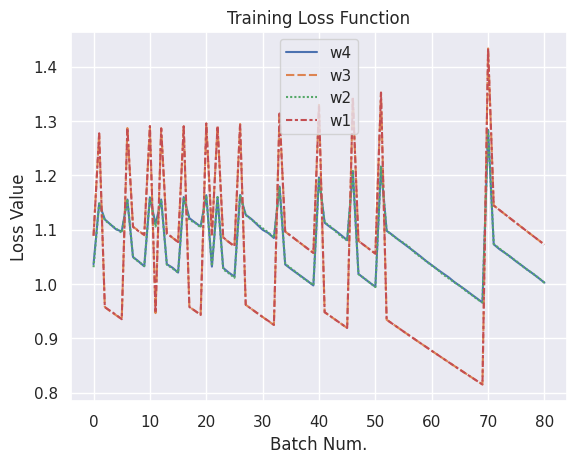

In [15]:
stats_train.get_loss_ts(plot=True)

In [16]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-05-23 13:03:38,711] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-05-23 13:03:38,712] Sending data to sources
[INFO][2024-05-23 13:03:39,132] Data is ready in sources
[INFO][2024-05-23 13:03:39,133] Phase prediction requested from Main Server
[INFO][2024-05-23 13:03:45,552] Processing experiment phase data
[INFO][2024-05-23 13:03:45,554] Processing experiment phase data completed
[INFO][2024-05-23 13:03:45,554] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-05-23 13:03:45,555] Statistics requested from Main Server
[INFO][2024-05-23 13:03:45,960] Statistics received from Main Server
[INFO][2024-05-23 13:03:45,961] Phase of prediction_phase prediction completed


In [17]:
stats_predict = API.get_experiment_flow(exp_name).generate_stats()

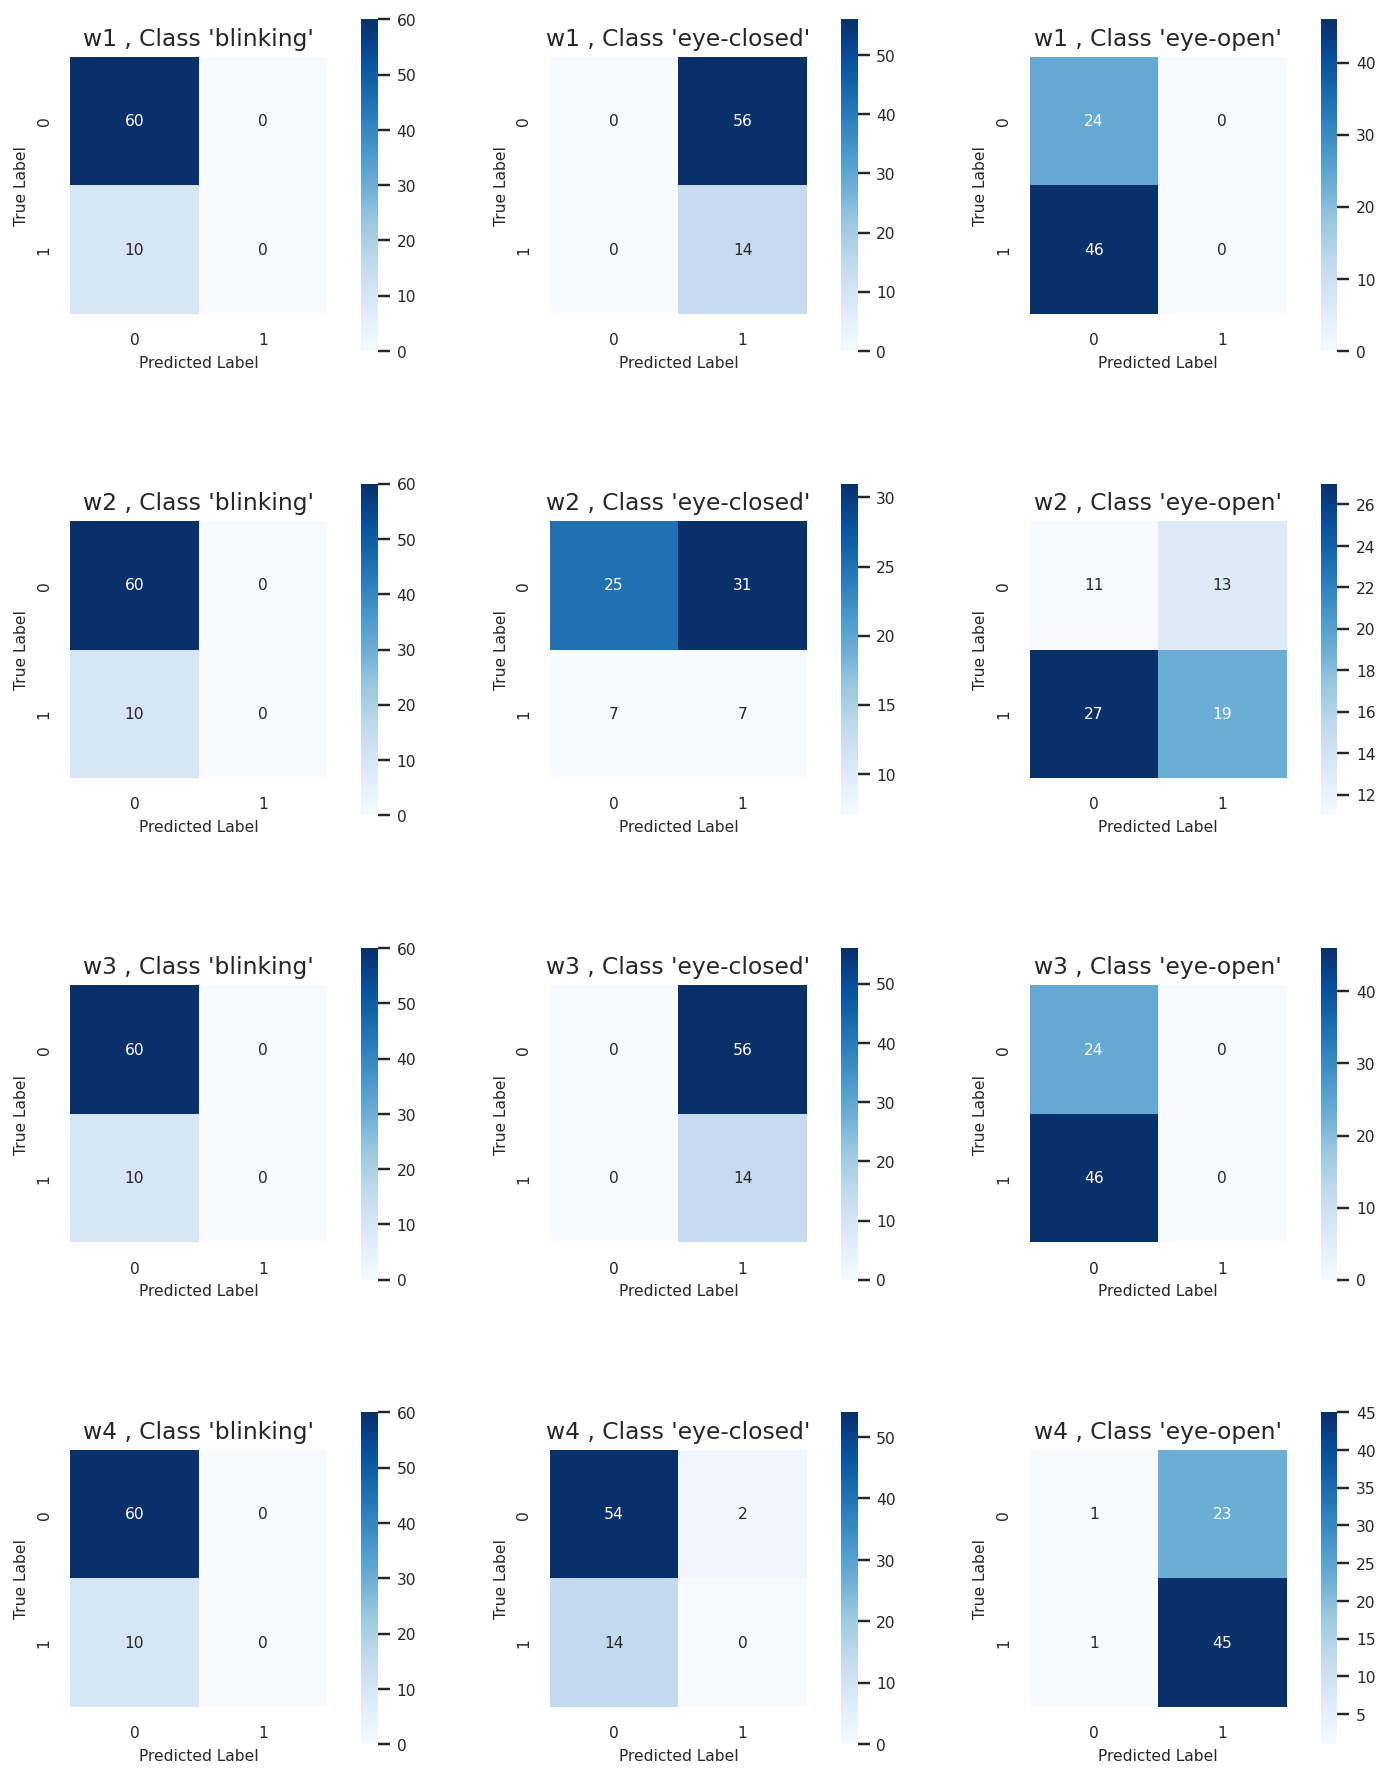

In [18]:
conf_mats_sources_workers , conf_mats_workers = stats_predict.get_confusion_matrices(plot=True)

In [20]:
model_perf = stats_predict.get_model_performence_stats(conf_mats_workers , show=True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,eye-closed,0,56,0,14,0.200000,0.500000,0.200000,1.000000,0.000000,0.000000,0.333333
1,w1,eye-open,24,0,46,0,0.342857,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
2,w1,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
3,w2,eye-closed,25,31,7,7,0.457143,0.473214,0.184211,0.500000,0.446429,-0.053571,0.269231
4,w2,eye-open,11,13,27,19,0.428571,0.435688,0.593750,0.413043,0.458333,-0.128623,0.487179
5,w2,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
6,w3,eye-closed,0,56,0,14,0.200000,0.500000,0.200000,1.000000,0.000000,0.000000,0.333333
7,w3,eye-open,24,0,46,0,0.342857,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
8,w3,blinking,60,0,10,0,0.857143,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000
9,w4,eye-closed,54,2,14,0,0.771429,0.482143,0.000000,0.000000,0.964286,-0.035714,0.000000
